# Training Example Creation
This is the program to perform labeling examples for supervised learning for
the anomality detection of Airconditioner.

It is extracted from the original program ./AC_labler.py for the purest behavior of training example creation.
With this program, the original program will be osbsolete.

*Author*: Steven Yuan

*Project lead*: Yu Shen

## Import packages

In [1]:
import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# from IPython.display import clear_output
#from tqdm import tqdm

from importlib import reload

aclabeler is a package that contains the functions to label the data.
It defines a class called `ACLabeler` that contains the functions to label the data.


In [2]:
import sys
sys.path.insert(0, '../scripts') # for aclabeler.py moved to src/scripts

import aclabeler

## Configurations

In [3]:
root_data_dir = '../../data/'  # The root directory for the data. All the paths are relative to this directory.
raw_temperatures_name = 'raw/indoor-temp-20220601-0912-ACELS_C40.csv.zip'  # File containing the RAW temperature data
# time_intervals = 'intervals/timewindows_4H_rs2022'  # File containing the definitions of the time intervals to create the time series data with labels
labeled_base_name = 'yaqian_tang_C40'  # File to output the labels for the time windows defined in the time_intervals

# be careful the value of labeled_time_intervals points to the results of labeling. If using the same value,
# I'm not sure if it will have the correct append behavor or just overwriting the existing labeling results!

autosave_freq = 20  # Number of labels before automatically saving
save_fig_path = 'images/labeling_samples/'  # Path to save images generated by the labeling program

## Create object labeler


The constructor ACLabeler takes a long time to execute. It might be optimized.

In [4]:
reload(aclabeler)
from aclabeler import ACLabeler

In [5]:
labeler = ACLabeler(
    root_data_dir         =root_data_dir,
    raw_temperatures_name =raw_temperatures_name,
    labeled_base_name      =labeled_base_name,
    save_fig_path=save_fig_path
    )

Loading raw/indoor-temp-20220601-0912-ACELS_C40.csv.zip all raw temperature data...


## Perform labeling by launching the interactive labeling function: labeler.label

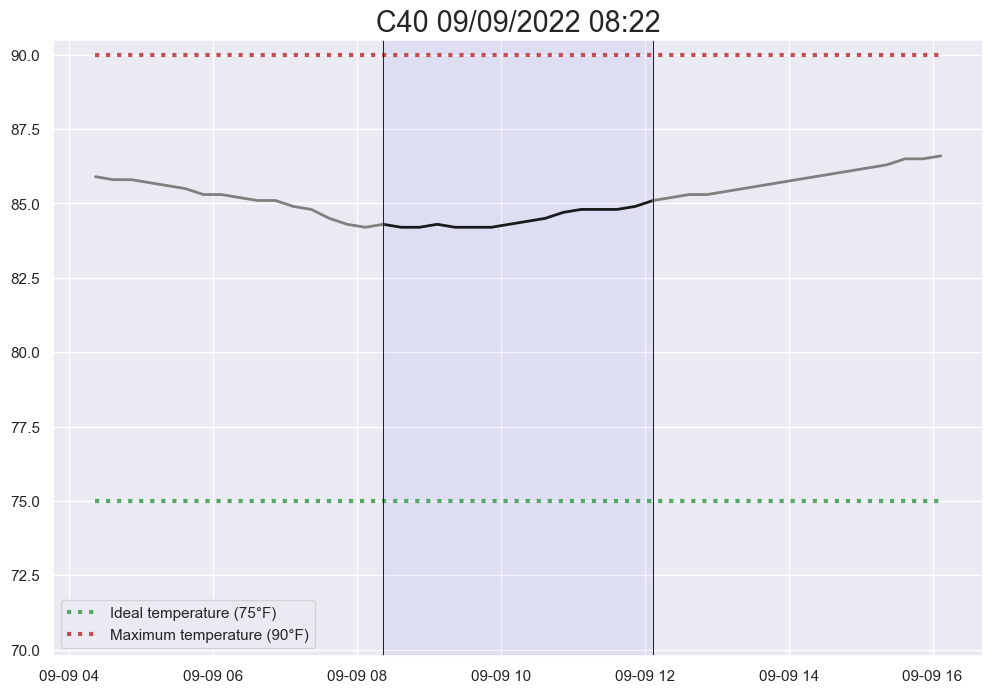

Enter label (n = normal, a = abnormal, u = Flip previous label,  p = Check progress, s = Save labels, i = Save figure, x=Skip to next data record, 0 = Exit):  0


Save normal complete!

0 normal labels and 0 abnormal labels saved.


In [7]:
context_before_hrs = 4  # Number of hours to plot before current time window as context
context_after_hrs = 4  # Number of hours to plot before current time window as context
lab = labeler.label(autosave_freq         =autosave_freq,
                    context_before_hrs    =context_before_hrs,
                    context_after_hrs     =context_after_hrs,
                    show_abnormality_score=False,
                    start_time            ='2022-09-09T08:07:01.000-0700'
                   )